In [1]:
import mne 
import itertools
import os
from mne import read_epochs
from mne.time_frequency import psd_welch
from mne.viz import plot_topomap
import matplotlib.pyplot as plt
import pandas as pd
from fooof import FOOOF
from fooof import FOOOFGroup
import numpy as np
import scipy.stats
import json
import collections

In [28]:
subj_id=[101,124,134,145]
for subj_id in subj_id:
    for session in range(3,9):
        df=pd.read_csv(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-beh.csv'   % (subj_id, subj_id, session))
        epochs=mne.read_epochs(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-motor-epo.fif'   % (subj_id, subj_id, session))
        epochs=epochs.pick_types(meg=True, ref_meg=False,misc=False)
        psds,freqs= mne.time_frequency.psd_welch(epochs,fmin=0,fmax=120)

Reading C:\Users\ytaza\Desktop\export\sub-101\sub-101-003-motor-epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.427 (s)
Reading C:\Users\ytaza\Desktop\export\sub-101\sub-101-004-motor-epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.427 (s)
Reading C:\Users\ytaza\Desktop\export\sub-101\sub-10

In [ ]:
print(df)

In [14]:
s_epochs = epochs.copy().crop(tmin=-0.5, tmax=0.5, include_tmax=True)

In [15]:
print(shorter_epochs)

<EpochsFIF |  56 events (all good), -0.5 - 0.5 sec, baseline off, ~70.6 MB, data loaded,
 '30': 56>


In [16]:
print(epochs)

<EpochsFIF |  56 events (all good), -1 - 2 sec, baseline off, ~211.1 MB, data loaded,
 '30': 56>


In [65]:
cats=['zero','low','med','high']
cat_params=[]
for cat in cats:
    session_params=[]
    for session in range(3,9):
        df=pd.read_csv(r'C:\Users\ytaza\Desktop\sub-101\sub-101\sub-101-00%d-beh.csv' % session)
        epochs=mne.read_epochs(r'C:\Users\ytaza\Desktop\sub-101\sub-101\sub-101-00%d-motor-epo.fif' % session)
        epochs=epochs.pick_types(meg=True, ref_meg=False,misc=False)
        s_epochs = epochs.copy().crop(tmin=-1, tmax=0, include_tmax=True)
        psds,freqs= mne.time_frequency.psd_welch(s_epochs,fmin=0,fmax=120)
        idx=df[df['coh_cat'] ==  cat].index.values
        mean_psds=np.mean(psds[idx,:,:],axis=0)
        fg = FOOOFGroup()
        fg.fit(freqs, mean_psds)
        exp = fg.get_params('aperiodic_params', 'exponent')
        session_params.append(exp)
    cat_params.append(session_params)
cat_params=np.array(cat_params)

Reading C:\Users\ytaza\Desktop\sub-101\sub-101\sub-101-003-motor-epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 274 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Reading C:\Users\ytaza\Desktop\sub-101\sub-101\s

In [66]:
cat_params_mean=np.mean(cat_params,axis=1)
zero=(cat_params_mean[0])
low=(cat_params_mean[1])
med=(cat_params_mean[2])
high=(cat_params_mean[3])
l_z=np.subtract(low,zero)
m_z=np.subtract(med,zero)
h_z=np.subtract(high,zero)
V=np.concatenate((l_z,m_z,h_z))

Text(0.5, 1.0, 'slope')

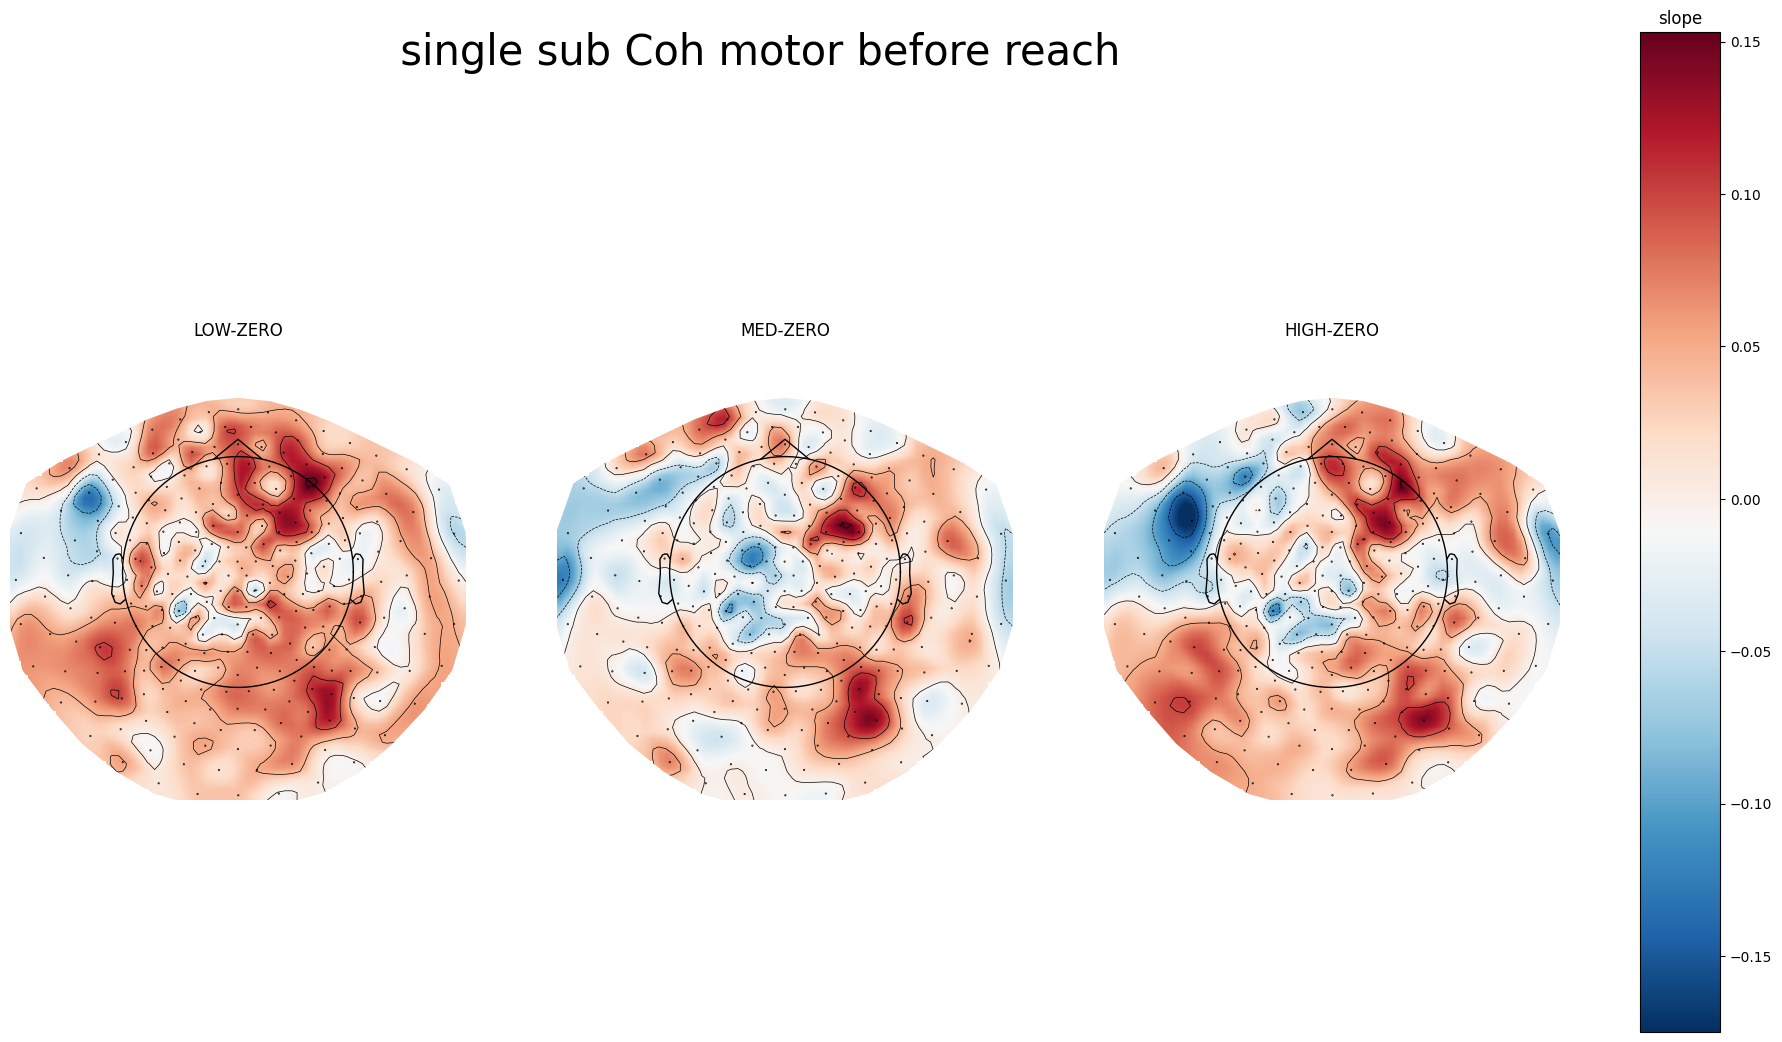

In [67]:
fig,(ax1,ax2,ax3)= plt.subplots (ncols=3, figsize=[20,20],facecolor="white", sharey=False, sharex=False)

fig.suptitle(' single sub Coh motor before reach ',fontsize=30,y=0.8)


             
im,cm=plot_topomap(l_z,s_epochs.info,cmap="RdBu_r",show=False, axes=ax1,vmax=np.max(V),vmin=np.min(V))
ax1.set(title="LOW-ZERO")


             
im,cm=plot_topomap(m_z, s_epochs.info, cmap="RdBu_r",show=False, axes=ax2,vmax=np.max(V),vmin=np.min(V))
ax2.set(title="MED-ZERO")



             
im,cm=plot_topomap(h_z,s_epochs.info,cmap="RdBu_r",show=False, axes=ax3,vmax=np.max(V),vmin=np.min(V))
ax3.set(title="HIGH-ZERO")

ax_x_start = 0.94
ax_x_width = 0.04
ax_y_start = 0.3
ax_y_height = 0.5
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title('slope')

In [60]:
cats=['zero','low','med','high']
cat_params=[]
for cat in cats:
    session_params=[]
    for session in range(3,9):
        df=pd.read_csv(r'C:\Users\ytaza\Desktop\sub-101\sub-101\sub-101-00%d-beh.csv' % session)
        epochs=mne.read_epochs(r'C:\Users\ytaza\Desktop\sub-101\sub-101\sub-101-00%d-motor-epo.fif' % session)
        epochs=epochs.pick_types(meg=True, ref_meg=False,misc=False)
        s_epochs = epochs.copy().crop(tmin=0, tmax=1.5, include_tmax=True)
        psds,freqs= mne.time_frequency.psd_welch(s_epochs,fmin=0,fmax=120)
        idx=df[df['coh_cat'] ==  cat].index.values
        mean_psds=np.mean(psds[idx,:,:],axis=0)
        fg = FOOOFGroup()
        fg.fit(freqs, mean_psds)
        exp = fg.get_params('aperiodic_params', 'exponent')
        session_params.append(exp)
    cat_params.append(session_params)
cat_params=np.array(cat_params)

Reading C:\Users\ytaza\Desktop\sub-101\sub-101\sub-101-003-motor-epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 274 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Reading C:\Users\ytaza\Desktop\sub-101\sub-101\s

In [61]:
cat_params_mean=np.mean(cat_params,axis=1)
zero=(cat_params_mean[0])
low=(cat_params_mean[1])
med=(cat_params_mean[2])
high=(cat_params_mean[3])
l_z=np.subtract(low,zero)
m_z=np.subtract(med,zero)
h_z=np.subtract(high,zero)
V=np.concatenate((l_z,m_z,h_z))

Text(0.5, 1.0, 'slope')

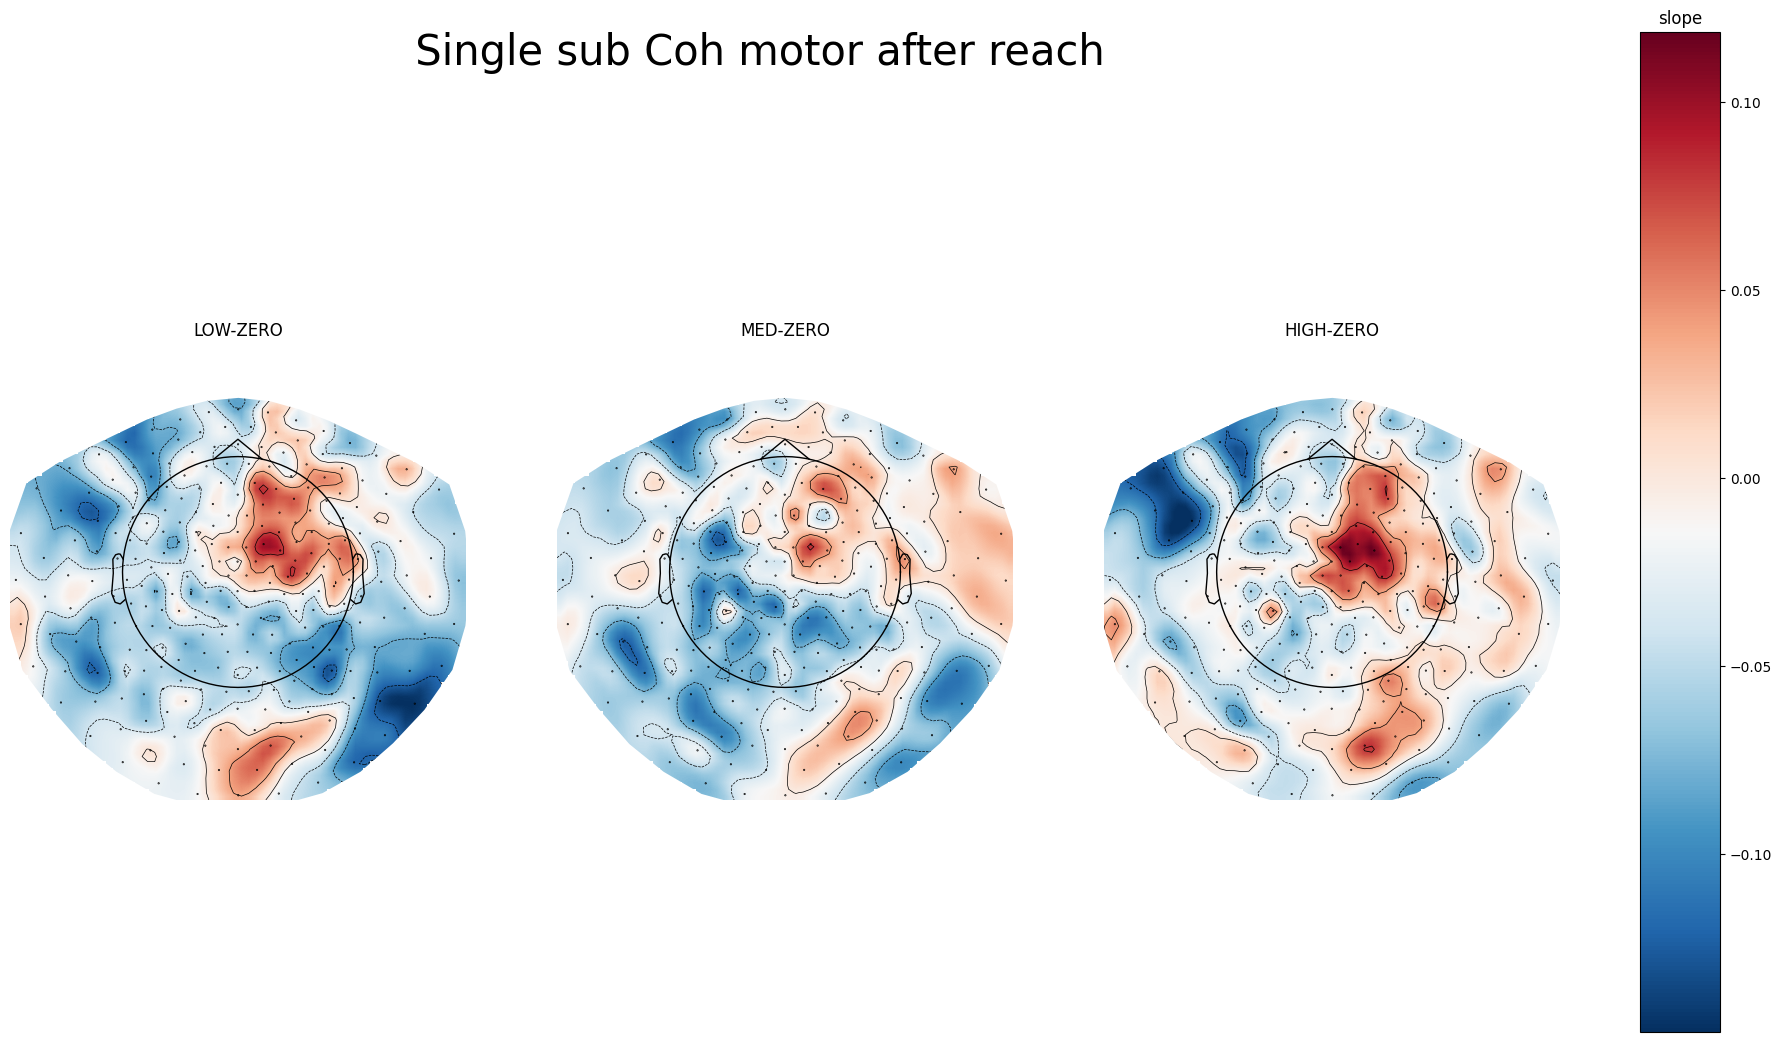

In [64]:
fig,(ax1,ax2,ax3)= plt.subplots (ncols=3, figsize=[20,20],facecolor="white", sharey=False, sharex=False)

fig.suptitle(' Single sub Coh motor after reach ',fontsize=30,y=0.8)


             
im,cm=plot_topomap(l_z,s_epochs.info,cmap="RdBu_r",show=False, axes=ax1,vmax=np.max(V),vmin=np.min(V))
ax1.set(title="LOW-ZERO")


             
im,cm=plot_topomap(m_z, s_epochs.info, cmap="RdBu_r",show=False, axes=ax2,vmax=np.max(V),vmin=np.min(V))
ax2.set(title="MED-ZERO")



             
im,cm=plot_topomap(h_z,s_epochs.info,cmap="RdBu_r",show=False, axes=ax3,vmax=np.max(V),vmin=np.min(V))
ax3.set(title="HIGH-ZERO")

ax_x_start = 0.94
ax_x_width = 0.04
ax_y_start = 0.3
ax_y_height = 0.5
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title('slope')

In [ ]:
motor_zero_inter=[]
subj_id=[101]
for subj_id in subj_id:
    session_params=[]
    for session in range(3,9):     
        df=pd.read_csv(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-beh.csv'   % (subj_id, subj_id, session))
        epochs=mne.read_epochs(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-motor-epo.fif'  % (subj_id, subj_id, session))  
        epochs=epochs.pick_types(meg=True, ref_meg=False,misc=False)
        psds,freqs= mne.time_frequency.psd_welch(epochs,fmin=0,fmax=120)
        idx=df[(df['perturb_cat'] == 0) & (df['coh_cat'] == 'zero')].index.values
        mean_psds=np.mean(psds[idx,:,:],axis=0)
        fg = FOOOFGroup()
        fg.fit(freqs, mean_psds)
        exp = fg.get_params('aperiodic_params', 'exponent')
        r2s = fg.get_params('r_squared')
        idxr2=np.where(r2s<0.95)
    
        
        session_params.append(exp)   
    motor_zero_inter.append(session_params)
motor_zero_inter=np.array(motor_zero_inter)

In [70]:
bef_motor_zero_inter=[]
subj_id=[101,124,134,145]
for subj_id in subj_id:
    session_params=[]
    for session in range(3,9):     
        df=pd.read_csv(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-beh.csv'   % (subj_id, subj_id, session))
        epochs=mne.read_epochs(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-motor-epo.fif'  % (subj_id, subj_id, session))  
        epochs=epochs.pick_types(meg=True, ref_meg=False,misc=False)
        bef_epochs = epochs.copy().crop(tmin=-1, tmax=0, include_tmax=True)
        psds,freqs= mne.time_frequency.psd_welch(bef_epochs,fmin=0,fmax=120)
        idx=df[(df['perturb_cat'] == 0) & (df['coh_cat'] == 'zero')].index.values
        mean_psds=np.mean(psds[idx,:,:],axis=0)
        fg = FOOOFGroup()
        fg.fit(freqs, mean_psds)
        exp = fg.get_params('aperiodic_params', 'exponent')
        session_params.append(exp)   
    bef_motor_zero_inter.append(session_params)
bef_motor_zero_inter=np.array(bef_motor_zero_inter)

Reading C:\Users\ytaza\Desktop\export\sub-101\sub-101-003-motor-epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 274 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Reading C:\Users\ytaza\Desktop\export\sub-101\sub

In [71]:
bef_motor_perturb_coh=[]
subj_id=[101,124,134,145]
for subj_id in subj_id:
    cats=['low','med','high']
    Perturbs = {-30.0,30.0}
    perturb_list=[]
    for perturb in Perturbs:
        cat_list=[]
        for cat in cats:
            session_params=[]
            for session in range(3,9):
                df=pd.read_csv(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-beh.csv'   % (subj_id, subj_id, session))
                epochs=mne.read_epochs(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-motor-epo.fif'  % (subj_id, subj_id, session))
                epochs=epochs.pick_types(meg=True, ref_meg=False,misc=False)
                bef_epochs=epochs.copy().crop(tmin=-1, tmax=0, include_tmax=True)
                psds,freqs= mne.time_frequency.psd_welch(bef_epochs,fmin=0,fmax=120)
                idx=df[(df['perturb_cat'] == perturb) & (df['coh_cat'] == cat)].index.values
                mean_psds=np.mean(psds[idx,:,:],axis=0)
                fg = FOOOFGroup()
                fg.fit(freqs, mean_psds)
                exp = fg.get_params('aperiodic_params', 'exponent')
                session_params.append(exp)
            cat_list.append(session_params)   
        perturb_list.append(cat_list)
    bef_motor_perturb_coh.append(perturb_list)
bef_motor_perturb_coh=np.array(bef_motor_perturb_coh)  

Reading C:\Users\ytaza\Desktop\export\sub-101\sub-101-003-motor-epo.fif ...
    Read 5 compensation matrices
    Found the data of interest:
        t =   -1000.00 ...    1500.00 ms
        5 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
56 matching events found
No baseline correction applied
0 projection items activated
Removing 5 compensators from info because not all compensation channels were picked.
Effective window size : 0.427 (s)

FOOOF WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Running FOOOFGroup across 274 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 2.34 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

Reading C:\Users\ytaza\Desktop\export\sub-101\sub

In [72]:
befmean=np.nanmean(bef_motor_perturb_coh,axis=(0,3))
befzmean=np.nanmean(bef_motor_zero_inter,axis=(0,1))

In [73]:
M30low=befmean[0,0,:]
M30med=befmean[0,1,:]
M30high=befmean[0,2,:]
P30low=befmean[1,0,:]
P30med=befmean[1,1,:]
P30high=befmean[1,2,:]
Nm30l_z=np.subtract(M30low,befzmean)                    
Nm30m_z=np.subtract(M30med,befzmean)        
Nm30h_z=np.subtract(M30high,befzmean)        
Np30l_z=np.subtract(P30low,befzmean)
Np30m_z=np.subtract(P30med,befzmean)       
Np30h_z=np.subtract(P30high,befzmean)
V=np.concatenate((Nm30l_z,Nm30m_z,Nm30h_z,Np30l_z,Np30m_z,Np30h_z))

Text(0.5, 1.0, 'slope')

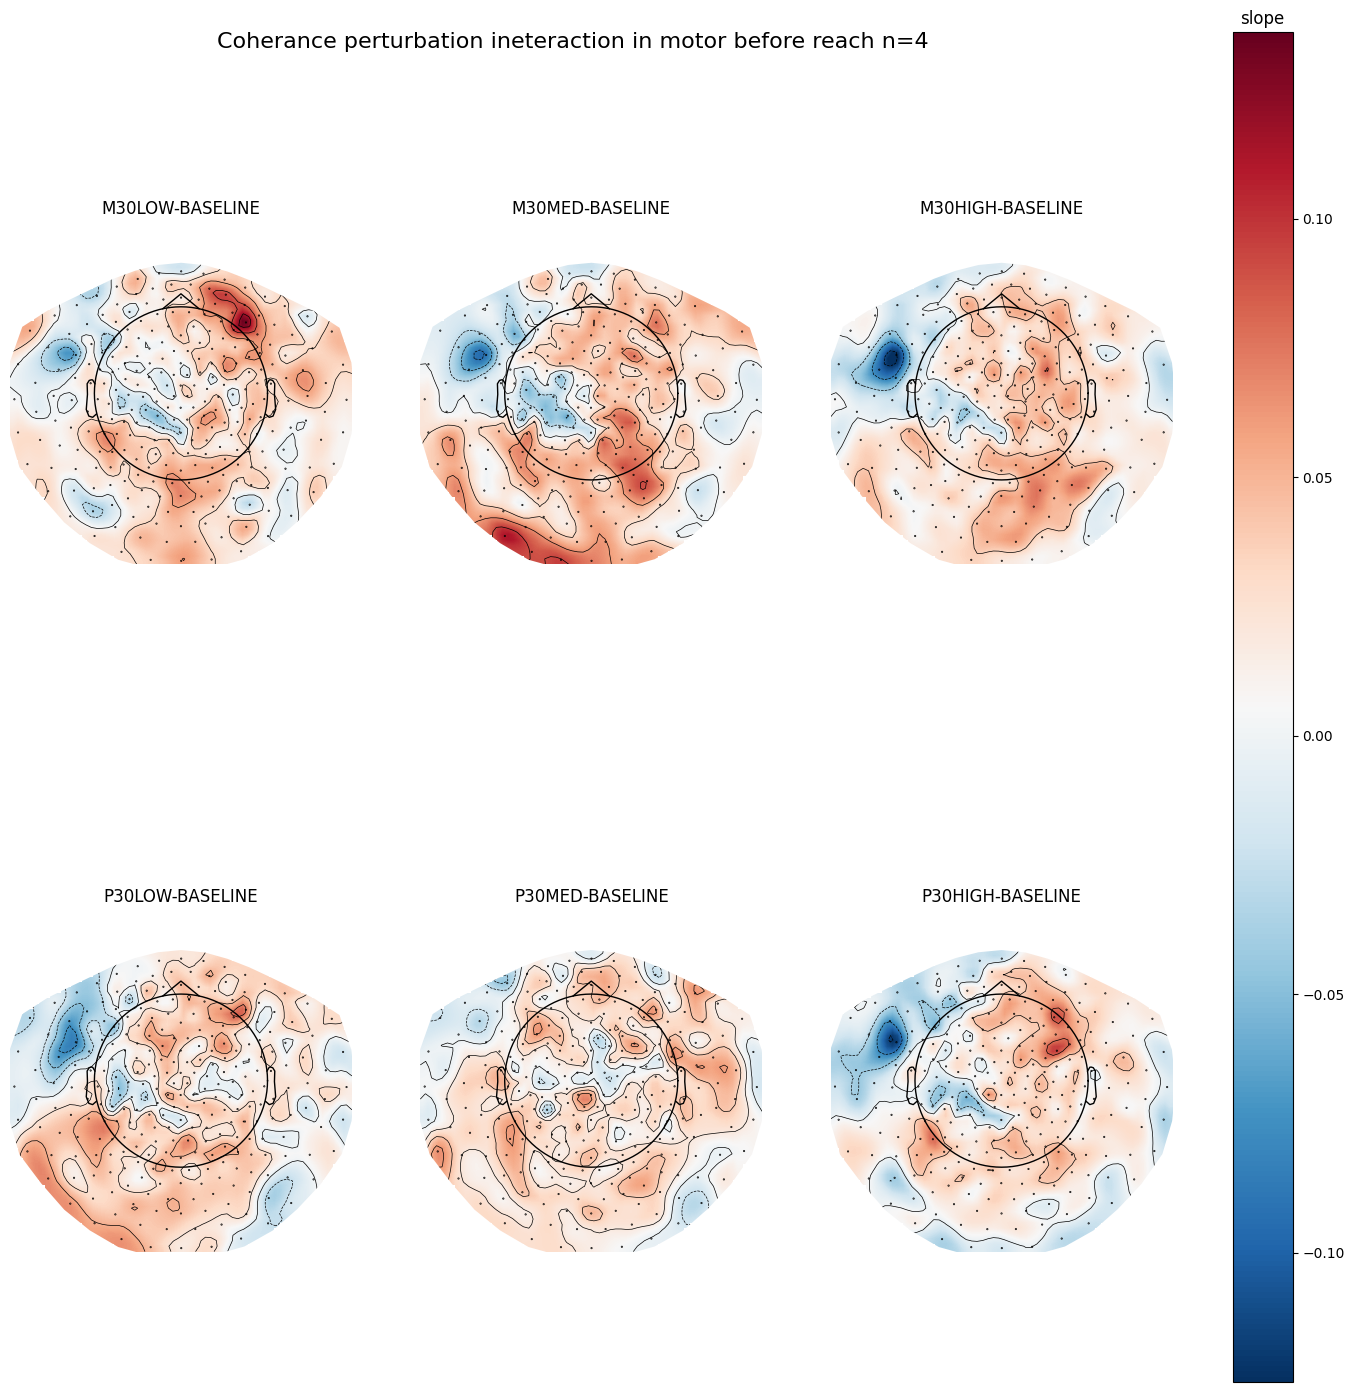

In [74]:
fig,[[ax1,ax2,ax3],[ax4,ax5,ax6]]= plt.subplots(2,3, figsize=[15,15],facecolor="white", sharey=False, sharex=False)
fig.suptitle('Coherance perturbation ineteraction in motor before reach n=4',fontsize=16,y=1)

im,cm =plot_topomap(Nm30l_z,epochs.info,cmap="RdBu_r",show=False, axes=ax1,vmax=np.max(V),vmin=np.min(V))
ax1.set(title="M30LOW-BASELINE")

im,cm =plot_topomap(Nm30m_z, epochs.info, cmap="RdBu_r",show=False, axes=ax2,vmax=np.max(V),vmin=np.min(V))
ax2.set(title="M30MED-BASELINE")

im,cm =plot_topomap(Nm30h_z,epochs.info,cmap="RdBu_r",show=False, axes=ax3,vmax=np.max(V),vmin=np.min(V))
ax3.set(title="M30HIGH-BASELINE")

im,cm =plot_topomap(Np30l_z,epochs.info,cmap="RdBu_r",show=False, axes=ax4,vmax=np.max(V),vmin=np.min(V))
ax4.set(title="P30LOW-BASELINE")

im,cm =plot_topomap(Np30m_z, epochs.info, cmap="RdBu_r",show=False, axes=ax5,vmax=np.max(V),vmin=np.min(V))
ax5.set(title="P30MED-BASELINE")

im,cm =plot_topomap(Np30h_z,epochs.info,cmap="RdBu_r",show=False, axes=ax6,vmax=np.max(V),vmin=np.min(V))
ax6.set(title="P30HIGH-BASELINE")

ax_x_start = 0.94
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
clb.ax.set_title('slope')

In [ ]:
aft_motor_zero_inter=[]
subj_id=[101,124,134,145]
for subj_id in subj_id:
    session_params=[]
    for session in range(3,9):     
        df=pd.read_csv(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-beh.csv'   % (subj_id, subj_id, session))
        epochs=mne.read_epochs(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-motor-epo.fif'  % (subj_id, subj_id, session))  
        epochs=epochs.pick_types(meg=True, ref_meg=False,misc=False)
        aft_epochs = epochs.copy().crop(tmin=0, tmax=1.5, include_tmax=True)
        psds,freqs= mne.time_frequency.psd_welch(bef_epochs,fmin=0,fmax=120)
        idx=df[(df['perturb_cat'] == 0) & (df['coh_cat'] == 'zero')].index.values
        mean_psds=np.mean(psds[idx,:,:],axis=0)
        fg = FOOOFGroup()
        fg.fit(freqs, mean_psds)
        exp = fg.get_params('aperiodic_params', 'exponent')
        session_params.append(exp)   
    aft_motor_zero_inter.append(session_params)
aft_motor_zero_inter=np.array(aft_motor_zero_inter)

In [ ]:
aft_motor_perturb_coh=[]
subj_id=[101,124,134,145]
for subj_id in subj_id:
    cats=['low','med','high']
    Perturbs = {-30.0,30.0}
    perturb_list=[]
    for perturb in Perturbs:
        cat_list=[]
        for cat in cats:
            session_params=[]
            for session in range(3,9):
                df=pd.read_csv(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-beh.csv'   % (subj_id, subj_id, session))
                epochs=mne.read_epochs(r'C:\Users\ytaza\Desktop\export\sub-%d\sub-%d-00%d-motor-epo.fif'  % (subj_id, subj_id, session))
                epochs=epochs.pick_types(meg=True, ref_meg=False,misc=False)
                bef_epochs=epochs.copy().crop(tmin=-1, tmax=0, include_tmax=True)
                psds,freqs= mne.time_frequency.psd_welch(bef_epochs,fmin=0,fmax=120)
                idx=df[(df['perturb_cat'] == perturb) & (df['coh_cat'] == cat)].index.values
                mean_psds=np.mean(psds[idx,:,:],axis=0)
                fg = FOOOFGroup()
                fg.fit(freqs, mean_psds)
                exp = fg.get_params('aperiodic_params', 'exponent')
                session_params.append(exp)
            cat_list.append(session_params)   
        perturb_list.append(cat_list)
    aft_motor_perturb_coh.append(perturb_list)
aft_motor_perturb_coh=np.array(aft_motor_perturb_coh)

In [ ]:
aftmean=np.nanmean(bef_motor_perturb_coh,axis=(0,3))
aftzmean=np.nanmean(bef_motor_zero_inter,axis=(0,1))

In [ ]:
M30low=aftmean[0,0,:]
M30med=aftmean[0,1,:]
M30high=aftmean[0,2,:]
P30low=aftmean[1,0,:]
P30med=aftmean[1,1,:]
P30high=aftmean[1,2,:]
Nm30l_z=np.subtract(M30low,aftzmean)                    
Nm30m_z=np.subtract(M30med,aftzmean)        
Nm30h_z=np.subtract(M30high,aftzmean)        
Np30l_z=np.subtract(P30low,aftzmean)
Np30m_z=np.subtract(P30med,aftzmean)       
Np30h_z=np.subtract(P30high,aftzmean)
V=np.concatenate((Nm30l_z,Nm30m_z,Nm30h_z,Np30l_z,Np30m_z,Np30h_z))